<a href="https://colab.research.google.com/github/KyleEtera/MAT422/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits, fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

**1.4.1. Singular Value Decomposition** - Lets say we have broken a m×n matrix, A, down into three matrices. Two orthogonal matrices, m×m U and n×n V, each containing the left singular vectors and right singular vectors of A. And a m×n matrix, ∑, which contains the singular values of A. We call this the Singular Value Decomposition of A, where A = U∑Vᵀ. The singular values are the square roots of the eigenvalues of AᵀA arranged in decreasing order.

What this allows us to do is to break down larger data into smaller, representative matrices and then recreate that original dataset.

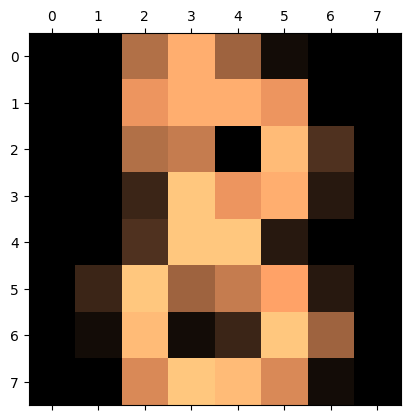

In [70]:
# Load a basic first example of numbers
X, y = load_digits(return_X_y=True)
# Select number 8
image = X[8]
# Reshape the 64 size array to 8x8 and show it
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'copper')
plt.show()

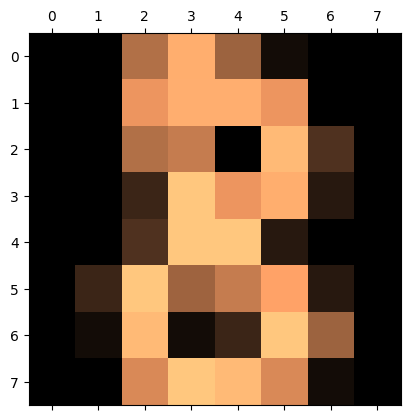

In [71]:
# Run an SVD algorithm
U, s, V = la.svd(image)
# Convert S matrix into a diagonal matrix
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
# Get sigma from S
Sigma = S[:, :n_component]
# Calculate V transposed
VT = V[:n_component, :]
# Reconstruct the SVD and show the image has no loss
A = U.dot(S.dot(V))
plt.matshow(A, cmap = 'copper')
plt.show()

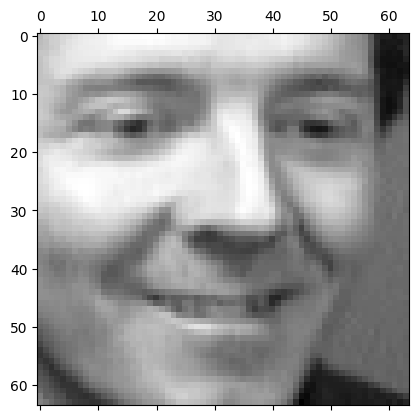

In [72]:
# Larger more detailed image example, same steps
# Fetch dataset of faces
X, y = fetch_olivetti_faces(return_X_y=True)
# Select face 22
image = X[21]
# Reshape the 4096 size array to 64x64 and show it
image = image.reshape((64, 64))
plt.matshow(image, cmap = 'gray')
plt.show()

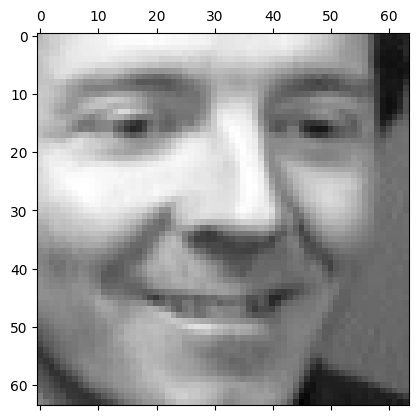

In [73]:
# Run an SVD algorithm
U, s, V = la.svd(image)
# Convert S matrix into a diagonal matrix
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
# Get sigma from S
Sigma = S[:, :n_component]
# Calculate V transposed
VT = V[:n_component, :]
# Reconstruct the SVD and show the image has no loss
A = U.dot(S.dot(V))
plt.matshow(A, cmap = 'gray')
plt.show()

 **1.4.2 Low-rank Matrix Approximations** - Taking a matrix A∈ℜⁿˣᵐ with SVD A = ∑aⱼuⱼvⱼᵀ from j=1 to r. We can truncate the sum at the k-th term for k < r in ∑aⱼuⱼvⱼᵀ from j=1 to k. Giving us Aₖ a rank exactly equal to k.

 From here we can say that the two norm ||A-Aₖ|| squared = σₑ squared where e = k+1. the two norm is defined as the maximum of xᵀAᵀAx where x≠0 and ||x||=1.

 We can also say that the two norm ||A-Aₖ|| squared <= the two norm ||A-B|| squared for any matrix B∈ℜ of rank at most k.

 This allows us to approximate matrices using lower rank matrices, or a minimization between the given matrix A and a matrix we are using to approximate some data.

**1.4.3 Principal Component Analysis** - Taking a matrix, X, with columns that are already in mean-deviation form, i.e. columns centered with respect to itself. We can reduce the number of vectors, dimensions, of this matrix by keeping it's variability in order to more easily plot it and more easily analyze it. We do this by:


1.   Determining it's covariance matrix
2.   Getting the covariance matrix's eigenvalues and eigenvectors (it's variability)
3.   Taking the dot product of the eigenvectors and mean-centered data, reducing it's dimensions



**Covariance Matrix** - Taking the sample mean of a p×n matrix, M = ∑(**Xₙ**)÷n, we can then find a new matrix X̂ₖ=Xₖ-M for k=1,...,n. Creating an p×n matrix of these matrices, X̂ₖ, called B we can find that this matrix has a sample mean of zero and it's columns are in mean-deviation form. This just means that the data will be centered on a plot. We can find a covariance matrix p×p, S = BBᵀ÷(n-1).

**Total Variance** - the diagonal values of S are the variance of the original matrix X at the same row. The total variance is the sum of these values, or the trace of the matrix.

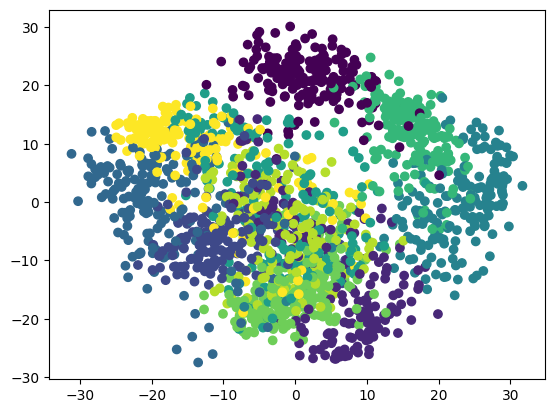

In [74]:
data = load_digits()
pca = PCA(2)
projected = pca.fit_transform(data.data)
plt.scatter(projected[:, 0], projected[:, 1], c=data.target)
plt.show()

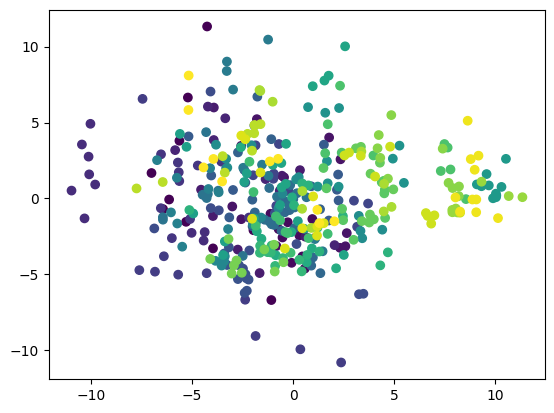

In [77]:
data = fetch_olivetti_faces()
pca = PCA(2)
projected = pca.fit_transform(data.data)
plt.scatter(projected[:, 0], projected[:, 1], c=data.target)
plt.show()

We can see that PCA used by itself is not necessarily super useful for evey set of data.